## Logistic Regression with Tensorflow 2.0

In [1]:
#import tensorflow as tf
import tensorflow as tf

print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Data preparation

연속형 데이터를 linear regression에 적용했다면 범주형 데이터는 logitic regression에 적용 가능

In [3]:
train_x = [[1,1],[1,3],[2,2],[2,4],[3,1],[3,3],[4,2],[4,4],[5,7],[5,9],[6,6],[6,8],[7,7],[7,9],[8,6],[8,8]]
train_y = [[0],[0],[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],[1],[1],[1]]

train_x = np.array(train_x)
train_y = np.array(train_y)

# 데이터의 형태를 float32 형태로 넣기 위함
train_x = train_x.astype('float32')
train_y = train_y.astype('float32')

In [4]:
print(train_x.shape)
print(train_y.shape)

(16, 2)
(16, 1)


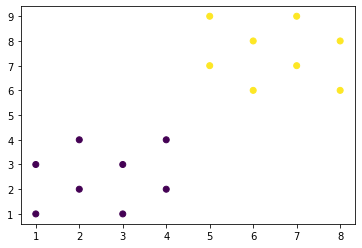

In [5]:
# 그래프 위에 나타내보기
plt.scatter(train_x[:,0:1], train_x[:,1:2], c=train_y)
plt.show()

### Logistic Regression

In [6]:
class LogisticWithTF():
    def __init__(self):
        self.epochs = 1000
        self.learning_rate = 0.17
        #TensoFlow v2에서는 tf.placeholder API가 삭제되고 지정된 함수에 값을 직접 넘겨주게 된다.
        self.w = tf.Variable(tf.random.normal(shape=[2,1], dtype=tf.float32))
        self.b = tf.Variable(tf.random.normal(shape=[1], dtype=tf.float32))
        
        
    #train_on_batch( ) : batch단위로 학습할 메인 모델을 정의
    #텐서플로는 자동 미분(주어진 입력 변수에 대한 연산의 그래디언트(gradient)를 계산하는 것)을 위한 tf.GradientTape API를 제공
    def train_on_batch(self, x, y):
        with tf.GradientTape() as tape:
            # sigmoid function 은 우리의 가설
            logit = tf.matmul(x, self.w) + self.b
            hypothesis = tf.sigmoid(logit)
            eps = 1e-10
            #오차함수
            loss = -tf.reduce_mean(y*tf.math.log(hypothesis+eps) + (1-y)*tf.math.log(1-hypothesis+eps))
            
        #gradient => cost를 minimize시키는 W,b를 찾는 대표적인 알고리즘 중 하나
        #tape.gradient를 호출해서 W와 b의 경사도(미분값)을 각각 기록하여 튜플로 반환 
        loss_dw, loss_db = tape.gradient(loss, [self.w, self.b])
        
        #assign_sub(-=연산)을 가져와 W와 b를 각각 업데이트
        self.w.assign_sub(self.learning_rate * loss_dw)
        self.b.assign_sub(self.learning_rate * loss_db)

        return loss

    #fitModel( ) : train_x, train_y를 가지고 model을 학습하는 메서드
    def fitModel(self, x, y):
        #tf.data.Dataset.from_tensor_slices => tf.data.Dataset 를 생성하는 함수로 입력된 텐서로부터 slices를 생성
        dataset = tf.data.Dataset.from_tensor_slices((x, y))
        dataset = dataset.shuffle(buffer_size=16).batch(8)

        loss_mem = []

        for e in range(self.epochs):
            for step, (x,y) in enumerate(dataset):
                loss = self.train_on_batch(x,y)
            loss_mem.append(loss)
        return loss_mem

    #predictModel( ) : train_x를 가지고 학습된 model의 결과에 적용해서 label을 도출하는 메서드
    def predictModel(self, x):
        logit = tf.matmul(x, self.w) + self.b
        hypothesis = tf.sigmoid(logit)
        return hypothesis

    #evalModel( ) : test_x, test_y를 가지고 학습된 model에 적용해서 res_y를 구하고 이를 test_y와 비교한 정확도 도출
    def evalModel(self, x, y):
        logit = tf.matmul(x, self.w) + self.b
        hypothesis = tf.sigmoid(logit)

        res_y = np.round(hypothesis, 0)
        accuracy = np.sum(res_y == y) / len(y)
        return accuracy, res_y

### Train

In [7]:
model = LogisticWithTF()
loss_mem = model.fitModel(train_x, train_y)

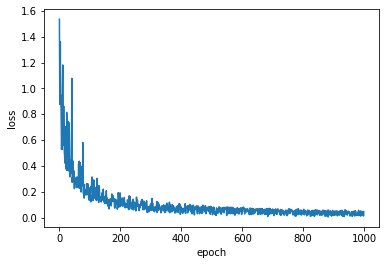

In [8]:
epochs_x = list(range(len(loss_mem)))
plt.plot(epochs_x, loss_mem)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
res_y = model.predictModel(train_x)

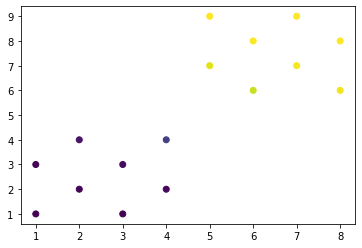

In [14]:
plt.scatter(train_x[:,0:1], train_x[:,1:2], c=res_y)
plt.show()

In [19]:
print('train_x --> predict(예측값) --> train_y(정답)')
for i in range(len(res_y)):
    print(train_x[i],'-->', res_y.numpy()[i],'-->' ,train_y[i])

train_x --> predict(예측값) --> train_y(정답)
[1. 1.] --> [0.00067678] --> [0.]
[1. 3.] --> [0.00802132] --> [0.]
[2. 2.] --> [0.00468194] --> [0.]
[2. 4.] --> [0.0531795] --> [0.]
[3. 1.] --> [0.00272903] --> [0.]
[3. 3.] --> [0.03163987] --> [0.]
[4. 2.] --> [0.01865274] --> [0.]
[4. 4.] --> [0.18497157] --> [0.]
[5. 7.] --> [0.9495522] --> [1.]
[5. 9.] --> [0.99557024] --> [1.]
[6. 6.] --> [0.91631544] --> [1.]
[6. 8.] --> [0.9924093] --> [1.]
[7. 7.] --> [0.9870224] --> [1.]
[7. 9.] --> [0.99890006] --> [1.]
[8. 6.] --> [0.97789764] --> [1.]
[8. 8.] --> [0.9981107] --> [1.]


### Test

In [11]:
test_x = [[2,3],[3,2],[6,9],[7,8],[8,7]]
test_y = [[0],[0],[1],[1],[1]]

test_x = np.array(test_x, dtype=np.float32)
test_y = np.array(test_y, dtype=np.float32)

1.0


In [20]:
accuracy, res = model.evalModel(test_x, test_y)
print(accuracy)

1.0


In [21]:
print(res)

[[0.]
 [0.]
 [1.]
 [1.]
 [1.]]


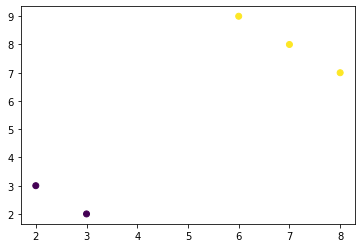

In [13]:
plt.scatter(test_x[:,0:1], test_x[:,1:2], c=res)
plt.show()